In [1]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [2]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [3]:
# model
model = Network(5, lr = None)
model.add_layer(DenseLayer(1, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 3, True, afn=softmax, dafn=None, rfn=None))

In [4]:
pso = PSO(dict(m = 50,
    weight_constraint = [-3, 3], 
    velocity_constraint = [-0.1, 0.1],
    c1 = 2,
    c2 = 2,
    w = 1.2,
    w_decay = 1,
    scale_hyperparameter = False,
    regularizer = l1_regularizer,
    mask = True))

see one see two 2 2


In [5]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = pso, \
    metrics = ['accuracy', 'mean_square_error', 'categorical_crossentropy'])

building layer 1 with 5
24
building layer 2 with 4
15


In [6]:
# data loading
DATA = os.path.join('c:\\Users\\AI-lab\\github_repo\\neural-network\\', 'dataset')
GROUP = 4
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 200
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [7]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)

In [8]:
# learning phase
breakpoint = 10
checkpoints = list()
history = list()
for century in range(0, EPOCHS, breakpoint):
    sub_history = model.fit(x_train, y_train, breakpoint, verbose = 0)
    score = model.evaluate(x_test, y_test, False, verbose = 0)
    print('Checkpoint {}, Accuracy: {}, Loss: {}'.format(century+breakpoint, score['accuracy'], score[model.loss_fn]))
    score['checkpoint'] = century + breakpoint
    checkpoints.append(score)
    history.extend(sub_history)

Checkpoint 10, Accuracy: 0.8148148148148148, Loss: 0.7349212787769459
Checkpoint 20, Accuracy: 0.8765432098765432, Loss: 0.5651772110550491
Checkpoint 30, Accuracy: 0.8580246913580247, Loss: 0.47446780734592015
Checkpoint 40, Accuracy: 0.8641975308641975, Loss: 0.4433296698111075
Checkpoint 50, Accuracy: 0.9074074074074074, Loss: 0.38350885885733144
Checkpoint 60, Accuracy: 0.9197530864197531, Loss: 0.39323863276728876
Checkpoint 70, Accuracy: 0.9382716049382716, Loss: 0.33868736690945095
Checkpoint 80, Accuracy: 0.9320987654320988, Loss: 0.32116547337284795
Checkpoint 90, Accuracy: 0.9320987654320988, Loss: 0.30336489500822844
Checkpoint 100, Accuracy: 0.9382716049382716, Loss: 0.30307900464093246
Checkpoint 110, Accuracy: 0.9567901234567902, Loss: 0.2742281843114782
Checkpoint 120, Accuracy: 0.9567901234567902, Loss: 0.2527569664849175
Checkpoint 130, Accuracy: 0.9629629629629629, Loss: 0.26076182612666376
Checkpoint 140, Accuracy: 0.9629629629629629, Loss: 0.2500717551619918
Checkpo

In [9]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for xi, yi in zip(x, y_list):
        ax.plot(xi, yi)
    if x_label is not None and y_label is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title='{} VS {}'.format(x_label, y_label))
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()

In [10]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[0. 1. 0.] <-> [0.06392786 0.9319314  0.00414068]
[1. 0. 0.] <-> [0.8966427  0.02805931 0.07529797]
[1. 0. 0.] <-> [0.79760444 0.02442225 0.17797329]
[1. 0. 0.] <-> [0.9387589  0.01565575 0.04558535]
[1. 0. 0.] <-> [0.938024   0.01813812 0.04383789]
[1. 0. 0.] <-> [0.7680186  0.19180039 0.04018098]
[1. 0. 0.] <-> [0.57469994 0.392548   0.03275201]
[0. 1. 0.] <-> [0.06107398 0.93510896 0.00381703]
[1. 0. 0.] <-> [0.9419568  0.01925751 0.03878567]
[1. 0. 0.] <-> [0.9193343  0.03609152 0.04457414]
[1. 0. 0.] <-> [0.9376847  0.02394245 0.03837281]
[1. 0. 0.] <-> [0.90913975 0.01303484 0.07782546]
[1. 0. 0.] <-> [0.9327296  0.01924328 0.04802714]
[1. 0. 0.] <-> [0.8596285  0.10570059 0.03467095]
[1. 0. 0.] <-> [0.9238798  0.01660241 0.05951779]
[0. 0. 1.] <-> [0.17715207 0.00132092 0.82152706]
[0. 1. 0.] <-> [0.16960515 0.81710535 0.01328943]
[1. 0. 0.] <-> [0.89208937 0.07679693 0.03111367]
[1. 0. 0.] <-> [0.8992232  0.01086782 0.08990899]
[0. 1. 0.] <-> [0.26493403 0.7189713  0.01609459]


In [11]:
train_acc = [h['accuracy'] for h in history]
train_mse = [h['mean_square_error'] for h in history]
train_cce = [h['categorical_crossentropy'] for h in history]

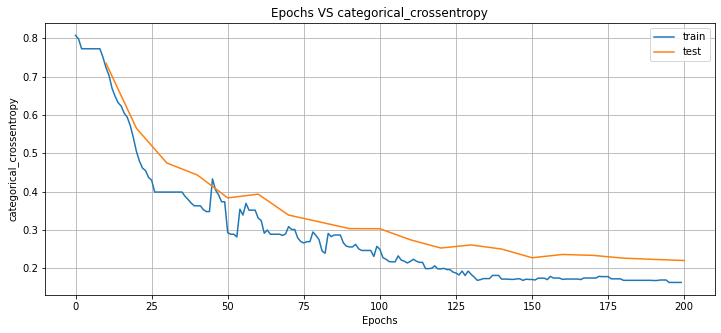

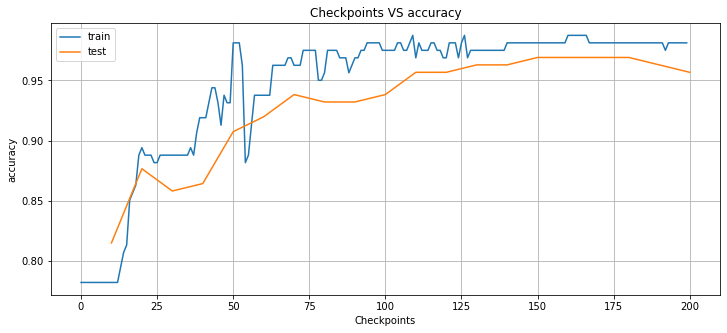

In [12]:
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [train_cce, [ ckp[model.loss_fn] for ckp in checkpoints ]], x_label = 'Epochs', \
    y_label = model.loss_fn, legend=['train', 'test'])
acc = [ ckp['accuracy'] for ckp in checkpoints ]
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [train_acc, acc], x_label = 'Checkpoints', \
    y_label = 'accuracy', legend=['train', 'test'])

In [13]:
for checkpoint in checkpoints:
    print(checkpoint, '\n\n')

{'accuracy': 0.8148148148148148, 'mean_square_error': 0.41578742833500115, 'categorical_crossentropy': 0.7349212787769459, 'essential_metrics': {0: {'tp_hit': 78, 'fp_hit': 30, 'tn_hit': 0, 'fn_hit': 0}, 1: {'tp_hit': 0, 'fp_hit': 0, 'tn_hit': 92, 'fn_hit': 16}, 2: {'tp_hit': 0, 'fp_hit': 0, 'tn_hit': 94, 'fn_hit': 14}}, 'checkpoint': 10} 


{'accuracy': 0.8765432098765432, 'mean_square_error': 0.31028006019963167, 'categorical_crossentropy': 0.5651772110550491, 'essential_metrics': {0: {'tp_hit': 78, 'fp_hit': 20, 'tn_hit': 10, 'fn_hit': 0}, 1: {'tp_hit': 10, 'fp_hit': 0, 'tn_hit': 92, 'fn_hit': 6}, 2: {'tp_hit': 0, 'fp_hit': 0, 'tn_hit': 94, 'fn_hit': 14}}, 'checkpoint': 20} 


{'accuracy': 0.8580246913580247, 'mean_square_error': 0.27543935175972684, 'categorical_crossentropy': 0.47446780734592015, 'essential_metrics': {0: {'tp_hit': 72, 'fp_hit': 17, 'tn_hit': 13, 'fn_hit': 6}, 1: {'tp_hit': 12, 'fp_hit': 6, 'tn_hit': 86, 'fn_hit': 4}, 2: {'tp_hit': 1, 'fp_hit': 0, 'tn_hit': 94, 'f

In [14]:
print(model)

Layer 1
Neuron 0: weights:
[ 0.11954498 -1.4170647   0.05098345  1.037829    1.135515  ]
 bias: -1.4126355648040771

Neuron 1: weights:
[-0.26787603  1.0344176  -0.04202643 -0.10988652 -0.05907748]
 bias: 0.013333137147128582

Neuron 2: weights:
[-0.15642022  0.6802546   1.1197835   0.03352064  0.03524494]
 bias: -0.19088847935199738

Neuron 3: weights:
[ 0.9371312  -1.7157218  -1.526232   -0.17106318 -0.6029814 ]
 bias: 0.746878981590271

$
Layer 2
Neuron 0: weights:
[-2.5686533   0.10121105 -1.1360561   2.2028747 ]
 bias: 0.04546010494232178

Neuron 1: weights:
[-2.3894053  1.3831686  0.5748537 -3.       ]
 bias: -0.16684909164905548

Neuron 2: weights:
[ 3.         -0.34724262 -1.9350965   0.05739799]
 bias: -1.505378007888794

$

